## Analysis of rose data from Garden.org

In [3]:
# importing lib

import numpy as np 
import pandas as pd 
import json
import os
import fnmatch
import re
import csv
from os import path
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
# stopping Jupyter outputting truncated results
pd.options.display.max_rows = 1000

In [6]:
# importing data
df = pd.read_csv('rose_scrape_garden_org_final.csv')

In [7]:
# close look at top 5 rowsof data
df.head(5)

,Name,URL,Alternative_Cultivar_Names,Awards,Awards_from_Data_Specific_to_Roses,Count_of_Alternative_Names,Bloom size,Bloom shape,Petal count,Rose bloom color,...,Leaves,Flowers,Flower Color,Flower Time,Uses,Wildlife Attractant,Miscellaneous,Parentage,Containers,Child plants
0,Anna-Zinkeisen,https://garden.org/plants/view/1736/Rose-Rosa-...,"Anna Zinkeisen, HARquhling",NaN,NaN,2.0,Medium: 2-3,NaN,full: 26-40 petals,Light yellow,...,Deciduous,Showy\nFragrant,Yellow,Late spring or early summer\nLate summer or ea...,Cut Flower,Bees,With thorns/spines/prickles/teeth,(((Chinatown x Golden Masterpiece) x (Super St...,NaN,NaN
1,Excellence,https://garden.org/plants/view/2740/Rose-Rosa-...,NaN,NaN,NaN,NaN,Large: 4-5,NaN,full: 26-40 petals,Dark red,...,Deciduous,Showy\nFragrant,Red,Spring\nSummer\nFall,Cut Flower,Bees,With thorns/spines/prickles/teeth,NaN,NaN,NaN
2,Trump-Card,https://garden.org/plants/view/4269/Rose-Rosa-...,NaN,NaN,NaN,NaN,Large: 4-5,High-centered,full: 26-40 petals,Pink blend,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Daniela-Kordana,https://garden.org/plants/view/695573/Rose-Ros...,"Daniela Kordana, KORpolare",NaN,NaN,2.0,Medium: 2-3,Other: Cupped to flat,very full: 40+ petals,Dark red,...,Deciduous,Showy,Red,Spring\nSummer\nFall,Cut Flower,Bees,With thorns/spines/prickles/teeth,Vanilla Kordana x Scarlet Parade,Suitable in 3 gallon or larger\nNeeds repottin...,NaN
4,Raf-Braeckman,https://garden.org/plants/view/703930/Rose-Ros...,NaN,NaN,NaN,NaN,Medium: 2-3,NaN,full: 26-40 petals,Orange and orange blend,...,Deciduous,Showy,Orange,Spring\nSummer\nFall,Cut Flower,Bees,With thorns/spines/prickles/teeth,Unknown,NaN,NaN


In [8]:
# overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7072 entries, 0 to 7071
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name                                7069 non-null   object 
 1   URL                                 7072 non-null   object 
 2   Alternative_Cultivar_Names          4488 non-null   object 
 3   Awards                              47 non-null     object 
 4   Awards_from_Data_Specific_to_Roses  337 non-null    object 
 5   Count_of_Alternative_Names          4484 non-null   float64
 6   Bloom size                          6538 non-null   object 
 7   Bloom shape                         3858 non-null   object 
 8   Petal count                         6531 non-null   object 
 9   Rose bloom color                    6529 non-null   object 
 10  Extra Bloom Info                    3352 non-null   object 
 11  Rebloom                             6517 no

### Value counts on each column in the dataset

In [9]:
df['Hybridizer & year'].value_counts()

Unknown                              114
Dr. Griffith J. Buck, 1984            29
Dr. Keith W. Zary, 1998               26
Harkness, 1998                        17
William A. Warriner, 1991             15
                                    ... 
Patrick Dickson, 1998                  1
Meilland, before 2000                  1
Horner, 2013                           1
Poulsen, 1993                          1
Discovered by Munch & Hause, 1921      1
Name: Hybridizer & year, Length: 4009, dtype: int64

In [10]:
df['Rose bloom color'].value_counts()

Pink blend                            882
White and white blend                 703
Medium pink                           545
Light pink                            450
Orange and orange blend               426
Medium red                            419
Mauve and mauve blend                 418
Yellow blend                          394
Apricot and apricot blend             388
Red blend                             342
Deep pink                             330
Dark red                              309
Orange pink                           253
Medium yellow                         225
Orange red                            142
Light yellow                          133
Deep yellow                           109
Russet                                 59
White and white blend\nLight pink       1
White and white blend\nMedium pink      1
Name: Rose bloom color, dtype: int64

In [11]:
df['Flower Color'].value_counts()

Pink                                                 1897
Red                                                   770
Yellow                                                588
White                                                 482
Orange                                                383
Other: Apricot blend                                  365
Mauve                                                 223
Bi-Color: Pink and white                              183
Other: Orange-pink                                    171
Bi-Color: White and pink                              157
Bi-Color: Red and white                               153
Bi-Color: Yellow and pink                             105
Bi-Color: Orange and yellow                           104
Purple                                                 97
Bi-Color: Red and yellow                               73
Bi-Color: Yellow and red                               55
Bi-Color: Pink and yellow                              54
Lavender      

In [12]:
df['Uses'].value_counts()

Cut Flower                                                         6538
Windbreak or Hedge\nCut Flower                                      192
Groundcover\nCut Flower                                             141
Windbreak or Hedge\nErosion control\nMedicinal Herb\nCut Flower       1
Medicinal Herb\nCut Flower                                            1
Medicinal Herb\nCut Flower\nWill Naturalize                           1
Cut Flower\nWill Naturalize                                           1
Groundcover\nCut Flower\nDried Flower                                 1
Cut Flower\nDried Flower                                              1
Windbreak or Hedge\nMedicinal Herb\nCut Flower\nWill Naturalize       1
Name: Uses, dtype: int64

In [13]:
df['Wildlife Attractant'].value_counts()

Bees                                      6728
Bees\nButterflies                          145
Bees\nBirds\nButterflies                     3
Bees\nBirds\nButterflies\nHummingbirds       1
Bees\nOther Beneficial Insects               1
Name: Wildlife Attractant, dtype: int64

In [14]:
df['Flowers'].value_counts()

Showy\nFragrant                        5571
Showy                                  1303
Showy\nMalodorous                         3
Showy\nFragrant\nBlooms on new wood       1
Showy\nFragrant\nBlooms on old wood       1
Name: Flowers, dtype: int64

In [15]:
df['Plant Habit'].value_counts()

Shrub    6879
Name: Plant Habit, dtype: int64

In [16]:
df['Life cycle'].value_counts()

Perennial    6879
Name: Life cycle, dtype: int64

In [17]:
df['Sun Requirements'].value_counts()

Full Sun                                                         6738
Full Sun\nFull Sun to Partial Shade                               139
Full Sun to Partial Shade                                           1
Full Sun\nFull Sun to Partial Shade\nPartial or Dappled Shade       1
Name: Sun Requirements, dtype: int64

In [18]:
df['Rebloom'].value_counts()

Good         5291
Some          562
None          529
Excellent     135
Name: Rebloom, dtype: int64

In [19]:
df['Class'].value_counts()

Hybrid tea                                                                                                         1430
Floribunda                                                                                                         1230
Shrub                                                                                                               949
Miniature                                                                                                           508
Large-flowered climber                                                                                              213
Grandiflora                                                                                                         151
Gallica                                                                                                             119
Hybrid perpetual                                                                                                    108
Polyantha                               

In [20]:
df['Bloom size'].value_counts()

Medium: 2-3              2965
Large: 4-5               2538
Small: under 2            899
Very large: 6 or more     136
Name: Bloom size, dtype: int64

In [21]:
df['Bloom shape'].value_counts()

High-centered                                1668
Cupped                                        847
Flat                                          343
Globular                                      209
Other: Rosette                                148
Other: Cupped to flat                         125
Other: Saucer-shaped                          114
Other: Quartered                               90
Other: Lightly cupped                          66
Other: Button eye                              54
Other: Lax petals                              48
Other: Pompon                                  25
Other: Dahlia-like arrangement of petals       23
Other: Reflexed petals                         16
Cupped\nOther: Quartered                       14
Other: Quartered, with button eye               8
Other: Ruffled petals                           7
High-centered\nOther: Reflexed petals           3
Other: Rosette, button eye                      3
Cupped\nOther: Button eye                       3


In [22]:
df['Petal count'].value_counts()

full: 26-40 petals                                3299
double: 16-25 petals                              1276
very full: 40+ petals                              945
semi-double: 8-15 petals                           578
Single: 1-7 petals                                 428
very full: 40+ petals\nOther: Up to 170 petals       1
semi-double: 8-15 petals\ndouble: 16-25 petals       1
very full: 40+ petals\nOther: 70-80 petals           1
very full: 40+ petals\nOther: Button eye             1
full: 26-40 petals\nOther: Ruffled petals            1
Name: Petal count, dtype: int64

In [23]:
df['Fragrance'].value_counts()

Mild          2443
Strong        1940
Moderate      1352
None           407
None\nMild       1
Name: Fragrance, dtype: int64

In [24]:
df['Optimal growing zones'].value_counts()

USDA zone 6 and warmer     1175
USDA zone 5 and warmer      879
USDA zone 7 and warmer      576
USDA zone 4 and warmer      315
USDA zones 4-8              111
USDA zones 4-9               93
USDA zone 3 and warmer       67
USDA zone 6b and warmer      49
Zone 6b and warmer           40
USDA zone 2 and warmer       36
USDA zones 5-9               32
USDA zones 3-9               25
Zone 5b and warmer           24
USDA zones 4 through 8       20
USDA zones 4 through 9       15
USDA zone 5b and warmer      15
USDA zones 2-8               13
USDA zone 7b and warmer      11
Zone 7b and warmer            8
USDA Zones 6 and warmer       8
Zone 4b and warmer            6
USDA zone 2b and warmer       4
USDA zones 3-8                3
USDA zones 2-9                3
Zone 5 and warmer             3
USDA zones 3 through 8        2
USDA zone 3b and warmer       2
USDA Zones 5 and warmer       2
USDA zones 3-7                2
USDA zones 3 through 9        2
USDA zone 4b and warmer       2
USDA zon

In [25]:
df['Flower Time'].value_counts()

Spring\nSummer\nFall                                            5301
Late spring or early summer                                      528
Late spring or early summer\nLate summer or early fall           516
Spring\nSummer                                                     2
Late spring or early summer\nLate summer or early fall\nFall       1
Spring\nFall                                                       1
Late spring or early summer\nOther: Early Summer to frost          1
Spring\nLate spring or early summer\nSummer                        1
Late spring or early summer\nOther: early Summer to frost          1
Late summer or early fall\nOther: Early Summer to frost            1
Summer                                                             1
Spring\nSummer\nFall\nOther: Spring to frost                       1
Name: Flower Time, dtype: int64

In [26]:
df['Extra Bloom Info'].value_counts()

In clusters                                                                         1872
In small clusters                                                                    256
In large clusters                                                                    199
Semi-double to double, in clusters                                                   162
Double to full, in clusters                                                          114
Medium to large, in clusters                                                          66
Medium to large                                                                       51
Ruffled petals                                                                        38
Double to full                                                                        38
Single to semi-double, in clusters                                                    36
In clusters, with ruffled petals                                                      32
Semi-double to double

In [27]:
df['Extra Color Info'].value_counts()

White blend                                      42
Orange blend                                     41
Mauve blend                                      37
Salmon-pink                                      33
Several shades of pink                           29
                                                 ..
Light pink, with white edges                      1
Pink blend, darker centers, lighter edges         1
Mauve, purple blend                               1
Orange-red & brownish tones in cooler weather     1
Scarlet-red, with lighter red reverse             1
Name: Extra Color Info, Length: 1968, dtype: int64

In [28]:
df['Growth Habit'].value_counts()

Short, 2-3 feet, bushy                                                                                               708
Medium, 3-4 feet, bushy                                                                                              690
Medium, 3-4 feet, upright                                                                                            434
Medium-tall, 4-5 feet, bushy                                                                                         286
Medium-tall, 3-5 feet, bushy                                                                                         181
Short, 2-3 feet, upright                                                                                             169
Medium-tall, 4-5 feet, upright                                                                                       147
Short, 1-2 feet, bushy                                                                                               120
Medium-tall, 3-5 feet, upright  

In [29]:
df['Soil pH Preferences'].value_counts()

Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)    6876
Slightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)                                                                   3
Name: Soil pH Preferences, dtype: int64

In [30]:
df['Plant Height'].value_counts()

3-4 feet                                     1207
2-3 feet                                      979
4-5 feet                                      534
3-5 feet                                      337
1-2 feet                                      321
5-6 feet                                      180
4-6 feet                                      162
5-7 feet                                      114
6-8 feet                                       80
8-10 feet                                      76
2-4 feet                                       63
4-7 feet                                       56
8-12 feet                                      49
10-12 feet                                     48
10 feet                                        47
18-24 inches                                   34
5-8 feet                                       32
4-8 feet                                       31
3-6 feet                                       28
12-18 inches                                   28


In [31]:
df['Plant Spread'].value_counts()

2-3 feet                                   2013
3-4 feet                                    737
1-2 feet                                    523
2 feet                                      442
4-5 feet                                    203
3 feet                                      145
2-4 feet                                    120
3-5 feet                                    108
4-6 feet                                     88
6-8 feet                                     86
5-6 feet                                     81
12-18 inches                                 40
8-10 feet                                    38
10-15 feet                                   26
4 feet                                       26
18-24 inches                                 25
4-7 feet                                     24
5-7 feet                                     23
5-8 feet                                     20
3-6 feet                                     20
6-10 feet                               

In [32]:
df['Leaves'].value_counts()

Deciduous                                      6871
Deciduous\nFragrant                               2
Good fall color\nDeciduous                        2
Deciduous\nOther: Wrinkled (rugose) foliage       1
Unusual foliage color\nDeciduous                  1
Evergreen                                         1
Deciduous\nVariegated                             1
Name: Leaves, dtype: int64

In [33]:
df['Miscellaneous'].value_counts()

With thorns/spines/prickles/teeth                         6477
Tolerates poor soil\nWith thorns/spines/prickles/teeth       2
With thorns/spines/prickles/teeth\nMonoecious                1
Name: Miscellaneous, dtype: int64

In [34]:
df['Parentage'].value_counts()

Unknown                                   648
unknown                                    78
seedling x seedling                        37
Unnamed seedling x unnamed seedling        10
Seedling x Seedling                         9
                                         ... 
Arlene Francis x (Circus x Sweet Talk)      1
Margaret McGredy x Mabel Morse              1
Lucy Nicolas x Charles P. Kilham            1
Sport of: Radox Bouquet                     1
Berolina x seedling                         1
Name: Parentage, Length: 1985, dtype: int64

In [35]:
df['Containers'].value_counts()

Suitable in 3 gallon or larger\nNeeds repotting every 2 to 3 years\nNeeds excellent drainage in pots                                  710
Not suitable for containers                                                                                                            56
Suitable in 3 gallon or larger\nNeeds repotting every 2 to 3 years                                                                     32
Suitable in 1 gallon\nSuitable in 3 gallon or larger\nNeeds repotting every 2 to 3 years\nNeeds excellent drainage in pots             14
Suitable in 3 gallon or larger\nSuitable for hanging baskets\nNeeds repotting every 2 to 3 years\nNeeds excellent drainage in pots      6
Suitable in 3 gallon or larger\nNeeds excellent drainage in pots                                                                        4
Suitable in 1 gallon\nSuitable in 3 gallon or larger\nNeeds repotting every 2 to 3 years                                                2
Suitable in 3 gallon or larger    

In [36]:
df['Child plants'].value_counts()

one child plant    540
2 child plants     216
3 child plants     109
4 child plants      63
5 child plants      34
6 child plants      29
7 child plants      20
8 child plants      19
10 child plants     11
12 child plants      7
9 child plants       6
13 child plants      6
14 child plants      6
16 child plants      4
20 child plants      3
11 child plants      3
21 child plants      2
24 child plants      1
18 child plants      1
32 child plants      1
17 child plants      1
19 child plants      1
15 child plants      1
23 child plants      1
22 child plants      1
65 child plants      1
25 child plants      1
Name: Child plants, dtype: int64

### Changes needed to the data to make nice visuals. 

1.) Column ['Hybridizer & year'] contains two distinct bits of information. We want year to be an idependent column.

2.) Column ['Wildlife Attractant'] needs removal of \n. This is also not a very informative data. Mostly roses atract Bees plus other nectar loving incects. 

3.) Column ['Flowers'] needs removal of \n.

4.) Lol. What the point of columns (['Plant Habit'] if it is always populated with Shrub), ['Life cycle'] if it is always populated with Perennial :(

5.) Column ['Sun Requirements'] needs removal of \n.

6.) Column ['Class'] needs removal of \n. Interesting data. 

7.) Column ['Bloom shape'] needs removal of \n, may need extra cleaning. Interesting data. 

8.) Column ['Petal count'] needs removal of \n and other, needs standartizing. We have lots of unique enties that are of no use in this analysis. Interesting data. 

9.) Column ['Flower Time'] needs removal of \n.

10.) Column ['Uses'] needs removal of \n.

11.) Column ['Flower Color'] needs removal of \n.

12.) Column ['Soil pH Preferences'] needs removal of \n.

13.) Column ['Leaves'] needs removal of \n.

14.) Column ['Flower Color'] some times starts with lower case latters. This messes up value counts. 


In [37]:
# extracting year from column ['Hybridizer & year']

df['YEAR'] = df['Hybridizer & year'].str.extract('(\\d{4})', expand=False).str.strip()

df[['YEAR', 'Hybridizer & year']]

,YEAR,Hybridizer & year
0,1982,"Harkness, 1982"
1,2003,"O.L. Weeks, 2003"
2,2003,"Discovered by Cliff Orent, 2003"
3,2000,"Tim Hermann Kordes, 2000"
4,NaN,Unknown
...,...,...
7067,2004,"Gareth Fryer, 2004"
7068,1918,"Alister Clark, 1918"
7069,1930,"Wilhelm J.H. Kordes II, 1930"
7070,1983,"Reimer Kordes, 1983"


In [38]:
# extracting Hybridizer from column ['Hybridizer & year']

df['Hybridizer'] = df['Hybridizer & year'].str.extract('([A-Z].+)', expand=False).str.strip()

df['Hybridizer'] = df['Hybridizer'].str.replace('\d+', '')

df['Hybridizer'] = df['Hybridizer'].str.replace(',', '')

df[['YEAR', 'Hybridizer', 'Hybridizer & year']]

,YEAR,Hybridizer,Hybridizer & year
0,1982,Harkness,"Harkness, 1982"
1,2003,O.L. Weeks,"O.L. Weeks, 2003"
2,2003,Discovered by Cliff Orent,"Discovered by Cliff Orent, 2003"
3,2000,Tim Hermann Kordes,"Tim Hermann Kordes, 2000"
4,NaN,Unknown,Unknown
...,...,...,...
7067,2004,Gareth Fryer,"Gareth Fryer, 2004"
7068,1918,Alister Clark,"Alister Clark, 1918"
7069,1930,Wilhelm J.H. Kordes II,"Wilhelm J.H. Kordes II, 1930"
7070,1983,Reimer Kordes,"Reimer Kordes, 1983"


In [39]:
# 2.) Column ['Wildlife Attractant'] needs removal of \n.

df['Wildlife Attractant'] = df['Wildlife Attractant'].str.replace('\n', ', ')

df['Wildlife Attractant'].value_counts()

Bees                                      6728
Bees, Butterflies                          145
Bees, Birds, Butterflies                     3
Bees, Other Beneficial Insects               1
Bees, Birds, Butterflies, Hummingbirds       1
Name: Wildlife Attractant, dtype: int64

In [40]:
# 3.) Column ['Flowers'] needs removal of \n.

df['Flowers'] = df['Flowers'].str.replace('\n', ', ')

df['Flowers'].value_counts()

Showy, Fragrant                        5571
Showy                                  1303
Showy, Malodorous                         3
Showy, Fragrant, Blooms on old wood       1
Showy, Fragrant, Blooms on new wood       1
Name: Flowers, dtype: int64

In [41]:
# 5.) Column ['Sun Requirements'] needs removal of \n.

df['Sun Requirements'] = df['Sun Requirements'].str.replace('\n', ', ')

df['Sun Requirements'].value_counts()

Full Sun                                                         6738
Full Sun, Full Sun to Partial Shade                               139
Full Sun, Full Sun to Partial Shade, Partial or Dappled Shade       1
Full Sun to Partial Shade                                           1
Name: Sun Requirements, dtype: int64

In [42]:
# 6.) Column ['Class'] needs removal of \n.

df['Class'] = df['Class'].str.replace('\n', ', ')

df['Class'].value_counts()

Hybrid tea                                                                                                         1430
Floribunda                                                                                                         1230
Shrub                                                                                                               949
Miniature                                                                                                           508
Large-flowered climber                                                                                              213
Grandiflora                                                                                                         151
Gallica                                                                                                             119
Hybrid perpetual                                                                                                    108
Polyantha                               

In [43]:
df['Class'] = df['Class'].str.replace('Other: ', '')

df['Class'].value_counts()

Hybrid tea                                                                                                  1430
Floribunda                                                                                                  1230
Shrub                                                                                                        949
Miniature                                                                                                    508
Large-flowered climber                                                                                       213
Grandiflora                                                                                                  151
Gallica                                                                                                      119
Hybrid perpetual                                                                                             108
Polyantha                                                                                       

In [44]:
# 9.) Column ['Flower Time'] needs removal of \n.

df['Flower Time'] = df['Flower Time'].str.replace('\n', ', ')

df['Flower Time'].value_counts()

Spring, Summer, Fall                                            5301
Late spring or early summer                                      528
Late spring or early summer, Late summer or early fall           516
Spring, Summer                                                     2
Spring, Summer, Fall, Other: Spring to frost                       1
Late spring or early summer, Other: Early Summer to frost          1
Late summer or early fall, Other: Early Summer to frost            1
Late spring or early summer, Late summer or early fall, Fall       1
Late spring or early summer, Other: early Summer to frost          1
Spring, Late spring or early summer, Summer                        1
Spring, Fall                                                       1
Summer                                                             1
Name: Flower Time, dtype: int64

In [45]:
df['Flower Color'].value_counts()

Pink                                                 1897
Red                                                   770
Yellow                                                588
White                                                 482
Orange                                                383
Other: Apricot blend                                  365
Mauve                                                 223
Bi-Color: Pink and white                              183
Other: Orange-pink                                    171
Bi-Color: White and pink                              157
Bi-Color: Red and white                               153
Bi-Color: Yellow and pink                             105
Bi-Color: Orange and yellow                           104
Purple                                                 97
Bi-Color: Red and yellow                               73
Bi-Color: Yellow and red                               55
Bi-Color: Pink and yellow                              54
Lavender      

In [46]:
# What color is Pink\nWhite? Lets see images of roses using linked urls

df['URL'].loc[df['Flower Color'] == 'Pink\nWhite']

5956    https://garden.org/plants/view/537339/Wild-Pra...
6087    https://garden.org/plants/view/478177/Rose-Ros...
Name: URL, dtype: object

In [47]:
# 11.) Column ['Flower Color'] needs removal of \n.

df['Flower Color'] = df['Flower Color'].str.replace('\nOther: Green', '')

df['Flower Color'] = df['Flower Color'].str.replace('\nOther:', ', ')

df['Flower Color'] = df['Flower Color'].str.replace('Other: ', '')

df['Flower Color'] = df['Flower Color'].str.replace('pink\n', ', ')

df['Flower Color'] = df['Flower Color'].str.replace('\n', ' ')

df['Flower Color'].value_counts()

Pink                                                 1897
Red                                                   770
Yellow                                                588
White                                                 482
Orange                                                383
Apricot blend                                         365
Mauve                                                 223
Bi-Color: Pink and white                              183
Orange-pink                                           171
Bi-Color: White and pink                              157
Bi-Color: Red and white                               153
Bi-Color: Yellow and pink                             105
Bi-Color: Orange and yellow                           104
Purple                                                 97
Bi-Color: Red and yellow                               73
Bi-Color: Yellow and red                               55
Bi-Color: Pink and yellow                              54
Lavender      

In [48]:
# extracting Bi-Color from column ['Flower Color']

df['Bi-Color'] = df['Flower Color'].str.extract('(Bi-Color:)', expand=False).str.strip()

df['Flower Color'] = df['Flower Color'].str.replace('(Bi-Color: )', '')

df[['Flower Color', 'Bi-Color']].value_counts()

Flower Color                Bi-Color 
Pink and white              Bi-Color:    183
White and pink              Bi-Color:    157
Red and white               Bi-Color:    153
Yellow and pink             Bi-Color:    105
Orange and yellow           Bi-Color:    104
Red and yellow              Bi-Color:     73
Yellow and red              Bi-Color:     55
Pink and yellow             Bi-Color:     54
Yellow and orange           Bi-Color:     45
White and red               Bi-Color:     19
White and yellow            Bi-Color:     15
Pink and cream              Bi-Color:     13
Mauve and white             Bi-Color:     11
Orange and white            Bi-Color:      9
Red and purple              Bi-Color:      9
Orange and pink             Bi-Color:      8
Red and pink                Bi-Color:      7
Pink and apricot            Bi-Color:      6
Pink and red                Bi-Color:      6
Purple and white            Bi-Color:      5
yellow and pink             Bi-Color:      5
Pink and mauve   

In [49]:
# extracting Multi-Color from column ['Flower Color']

df['Multi-Color'] = df['Flower Color'].str.extract('(Multi-Color:)', expand=False).str.strip()

df['Flower Color'] = df['Flower Color'].str.replace('(Multi-Color: )', '')

df[['Flower Color', 'Multi-Color']].value_counts()

Flower Color                          Multi-Color 
Orange, pink, and yellow              Multi-Color:    7
Red, white, and yellow                Multi-Color:    5
Orange, yellow, and pink              Multi-Color:    5
Pink, yellow, and orange              Multi-Color:    4
Orange, apricot, and pink             Multi-Color:    4
Yellow, pink, and orange              Multi-Color:    4
White, pink, and yellow               Multi-Color:    4
Yellow, orange, and pink              Multi-Color:    3
Orange, yellow, and red               Multi-Color:    3
Yellow, pink, and red                 Multi-Color:    3
Pink, yellow, and white               Multi-Color:    2
Red, yellow, and white                Multi-Color:    2
White, pink, and red                  Multi-Color:    2
Pink, red, and white                  Multi-Color:    2
White, yellow, and pink               Multi-Color:    2
Yellow, red, and orange               Multi-Color:    2
Red, cream, and yellow                Multi-Color:   

In [50]:
# removing "Other: '

df['Flower Time'] = df['Flower Time'].str.replace('Other: ', ' ')

df['Flower Time'].value_counts()

Spring, Summer, Fall                                            5301
Late spring or early summer                                      528
Late spring or early summer, Late summer or early fall           516
Spring, Summer                                                     2
Spring, Summer, Fall,  Spring to frost                             1
Late summer or early fall,  Early Summer to frost                  1
Late spring or early summer,  Early Summer to frost                1
Late spring or early summer, Late summer or early fall, Fall       1
Late spring or early summer,  early Summer to frost                1
Spring, Late spring or early summer, Summer                        1
Spring, Fall                                                       1
Summer                                                             1
Name: Flower Time, dtype: int64

In [51]:
# 10.) Column ['Uses needs'] removal of \n.

df['Uses'] = df['Uses'].str.replace('\n', ', ')

df['Uses'].value_counts()

Cut Flower                                                         6538
Windbreak or Hedge, Cut Flower                                      192
Groundcover, Cut Flower                                             141
Cut Flower, Dried Flower                                              1
Groundcover, Cut Flower, Dried Flower                                 1
Medicinal Herb, Cut Flower, Will Naturalize                           1
Windbreak or Hedge, Medicinal Herb, Cut Flower, Will Naturalize       1
Cut Flower, Will Naturalize                                           1
Windbreak or Hedge, Erosion control, Medicinal Herb, Cut Flower       1
Medicinal Herb, Cut Flower                                            1
Name: Uses, dtype: int64

In [52]:
# ['Petal count'] before clean up

df['Petal count'].value_counts()

full: 26-40 petals                                3299
double: 16-25 petals                              1276
very full: 40+ petals                              945
semi-double: 8-15 petals                           578
Single: 1-7 petals                                 428
very full: 40+ petals\nOther: Up to 170 petals       1
semi-double: 8-15 petals\ndouble: 16-25 petals       1
very full: 40+ petals\nOther: 70-80 petals           1
very full: 40+ petals\nOther: Button eye             1
full: 26-40 petals\nOther: Ruffled petals            1
Name: Petal count, dtype: int64

In [53]:
# ['Petal count'] clean up

df['Petal count'] = df['Petal count'].str.replace('\nOther: Button eye', '')
df['Petal count'] = df['Petal count'].str.replace('\nOther: Ruffled petals', '')
df['Petal count'] = df['Petal count'].str.replace('\ndouble: 16-25 petals', '')
df['Petal count'] = df['Petal count'].str.replace('\nOther: Up to 170 petals', '')
df['Petal count'] = df['Petal count'].str.replace('\nOther: 70-80 petals', '')

df['Petal count'].value_counts()

full: 26-40 petals          3300
double: 16-25 petals        1276
very full: 40+ petals        948
semi-double: 8-15 petals     579
Single: 1-7 petals           428
Name: Petal count, dtype: int64

In [54]:
df['Bloom shape'].value_counts()

High-centered                                1668
Cupped                                        847
Flat                                          343
Globular                                      209
Other: Rosette                                148
Other: Cupped to flat                         125
Other: Saucer-shaped                          114
Other: Quartered                               90
Other: Lightly cupped                          66
Other: Button eye                              54
Other: Lax petals                              48
Other: Pompon                                  25
Other: Dahlia-like arrangement of petals       23
Other: Reflexed petals                         16
Cupped\nOther: Quartered                       14
Other: Quartered, with button eye               8
Other: Ruffled petals                           7
High-centered\nOther: Reflexed petals           3
Other: Rosette, button eye                      3
Cupped\nOther: Button eye                       3


In [55]:
df['Bloom shape'] = df['Bloom shape'].str.replace('\nOther:', ', ')

df['Bloom shape'] = df['Bloom shape'].str.replace('Other: ', '')

df['Bloom shape'] = df['Bloom shape'].str.replace('\n', ', ')

df['Bloom shape'].value_counts()

High-centered                          1668
Cupped                                  847
Flat                                    343
Globular                                209
Rosette                                 148
Cupped to flat                          125
Saucer-shaped                           114
Quartered                                90
Lightly cupped                           66
Button eye                               54
Lax petals                               48
Pompon                                   25
Dahlia-like arrangement of petals        23
Reflexed petals                          16
Cupped,  Quartered                       14
Quartered, with button eye                8
Ruffled petals                            7
Cupped,  Button eye                       3
Rosette, button eye                       3
High-centered,  Reflexed petals           3
Scalloped petals                          3
Globular,  Lax petals                     2
Cupped, Flat                    

In [56]:
df['Flowers'] = df['Flowers'].str.replace('\n', ', ')

df['Flowers'].value_counts()

Showy, Fragrant                        5571
Showy                                  1303
Showy, Malodorous                         3
Showy, Fragrant, Blooms on old wood       1
Showy, Fragrant, Blooms on new wood       1
Name: Flowers, dtype: int64

In [57]:
# 12.) Column ['Soil pH Preferences'] needs removal of \n.

df['Soil pH Preferences'] = df['Soil pH Preferences'].str.replace('\n', ', ')

df['Soil pH Preferences'].value_counts()

Moderately acid (5.6 – 6.0), Slightly acid (6.1 – 6.5), Neutral (6.6 – 7.3), Slightly alkaline (7.4 – 7.8)    6876
Slightly acid (6.1 – 6.5), Neutral (6.6 – 7.3)                                                                   3
Name: Soil pH Preferences, dtype: int64

In [58]:
# 13.) Column ['Leaves'] needs removal of \n.

df['Leaves'] = df['Leaves'].str.replace('\n', ', ')

df['Leaves'].value_counts()

Deciduous                                      6871
Deciduous, Fragrant                               2
Good fall color, Deciduous                        2
Deciduous, Variegated                             1
Unusual foliage color, Deciduous                  1
Evergreen                                         1
Deciduous, Other: Wrinkled (rugose) foliage       1
Name: Leaves, dtype: int64

In [59]:
# 14.) Column ['Flower Color'] some times starts with lower case latters. This messes up value counts.  


df['Flower Color2'] = df['Flower Color'].str.capitalize()

df['Flower Color'] = df['Flower Color'].str.title()

df[['Flower Color', 'Flower Color2']].value_counts()


Flower Color                          Flower Color2                       
Pink                                  Pink                                    1897
Red                                   Red                                      770
Yellow                                Yellow                                   588
White                                 White                                    482
Orange                                Orange                                   383
Apricot Blend                         Apricot blend                            365
Mauve                                 Mauve                                    223
Pink And White                        Pink and white                           184
Orange-Pink                           Orange-pink                              172
White And Pink                        White and pink                           158
Red And White                         Red and white                            155
Yellow And P

In [60]:
# 15.) Column ['Rose bloom color'] some times in lower case latters and sometimes with capitals . This messes up value counts.  

df['Rose bloom color'] = df['Rose bloom color'].str.title()

df['Rose bloom color'] = df['Rose bloom color'].str.replace('\n', ', ')

df[['Rose bloom color']].value_counts()

Rose bloom color                  
Pink Blend                            882
White And White Blend                 703
Medium Pink                           545
Light Pink                            450
Orange And Orange Blend               426
Medium Red                            419
Mauve And Mauve Blend                 418
Yellow Blend                          394
Apricot And Apricot Blend             388
Red Blend                             342
Deep Pink                             330
Dark Red                              309
Orange Pink                           253
Medium Yellow                         225
Orange Red                            142
Light Yellow                          133
Deep Yellow                           109
Russet                                 59
White And White Blend, Medium Pink      1
White And White Blend, Light Pink       1
dtype: int64

### Ideas for next steps


1.) How many roses have more than one name?

2.) Compare contents of color columns. 


111.) Create visual - bubble chart over time on rose colors and year created & class and year created.



####  1.) How many roses have more than one name?

In [61]:
# 1.) How many roses have more than one name?

df['Count_of_Alternative_Names'].value_counts()

2.0     2739
3.0      979
4.0      343
5.0      199
6.0       89
7.0       63
8.0       15
9.0       13
11.0      10
13.0       9
10.0       8
12.0       3
14.0       3
20.0       2
15.0       2
17.0       2
21.0       1
16.0       1
22.0       1
18.0       1
19.0       1
Name: Count_of_Alternative_Names, dtype: int64

#### 2.) Compare contents of color columns.

In this dataset we have three columns that describe rose color: 

- 'Rose bloom color'
- 'Flower Color'
- 'Extra Color Info'

Let's have a look what column is better populated. 

In [62]:
df[['Rose bloom color', 'Flower Color', 'Extra Color Info']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7072 entries, 0 to 7071
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rose bloom color  6529 non-null   object
 1   Flower Color      6392 non-null   object
 2   Extra Color Info  3275 non-null   object
dtypes: object(3)
memory usage: 165.9+ KB


In [63]:
# Number of unique entries in column ['Rose bloom color']

df['Rose bloom color'].nunique()

20

In [64]:
# Number of unique entries in column ['Flower Color']

df['Flower Color'].nunique()

171

In [65]:
# Number of unique entries in column ['Extra Color Info']

df['Extra Color Info'].nunique()

1968

In [66]:
# 2.) Compare contents of color columns.

df[['Rose bloom color', 'Flower Color']].value_counts()

Rose bloom color                    Flower Color                        
Pink Blend                          Pink                                    556
Medium Pink                         Pink                                    528
White And White Blend               White                                   478
Light Pink                          Pink                                    436
Medium Red                          Red                                     405
Apricot And Apricot Blend           Apricot Blend                           359
Deep Pink                           Pink                                    319
Dark Red                            Red                                     294
Orange And Orange Blend             Orange                                  244
Mauve And Mauve Blend               Mauve                                   222
Medium Yellow                       Yellow                                  215
Pink Blend                          Pink And Wh

In [67]:
df[['Flower Color', 'Rose bloom color']].value_counts()

Flower Color                          Rose bloom color                  
Pink                                  Pink Blend                            556
                                      Medium Pink                           528
White                                 White And White Blend                 478
Pink                                  Light Pink                            436
Red                                   Medium Red                            405
Apricot Blend                         Apricot And Apricot Blend             359
Pink                                  Deep Pink                             319
Red                                   Dark Red                              294
Orange                                Orange And Orange Blend               244
Mauve                                 Mauve And Mauve Blend                 222
Yellow                                Medium Yellow                         215
Pink And White                        Pink Blen

In [68]:
df[['Rose bloom color', 'Flower Color', 'Extra Color Info']].value_counts()

Rose bloom color           Flower Color     Extra Color Info                                  
White And White Blend      White            White blend                                           41
Orange And Orange Blend    Orange           Orange blend                                          35
Pink Blend                 Pink             Several shades of pink                                29
Mauve And Mauve Blend      Mauve            Mauve blend                                           28
Light Pink                 Pink             Light pink                                            22
                                                                                                  ..
Pink Blend                 Pink And Yellow  Pink, yellow, orange blend                             1
                                            Salmon-pink and yellow blend                           1
                                            Salmon-pink blend, with yellow and buff highlights   

In [69]:
# Where 'Flower Color' is blank but 'Rose bloom color' is populated

df[['Flower Color', 'Rose bloom color', 'Extra Color Info']].loc[(df['Flower Color'].isnull()) & (df['Rose bloom color'].notnull())]

,Flower Color,Rose bloom color,Extra Color Info
2,NaN,Pink Blend,"Magenta, with yellow reverse"
71,NaN,Medium Pink,NaN
79,NaN,Medium Pink,NaN
80,NaN,Mauve And Mauve Blend,"Mauve, with silver reverse"
89,NaN,Pink Blend,"White, with pink edges"
100,NaN,Medium Red,"Medium red, with lighter red reverse"
112,NaN,White And White Blend,"Cream, with pink edges"
168,NaN,Russet,"Muted burgundy red, silvery-mauve highlights, ..."
196,NaN,Medium Red,NaN
226,NaN,Orange And Orange Blend,Orange and pink blend


In [70]:
# Where 'Rose bloom color' is blank but 'Flower Color' is populated

df[['Rose bloom color', 'Flower Color', 'Extra Color Info']].loc[(df['Rose bloom color'].isnull()) & (df['Flower Color'].notnull())]

,Rose bloom color,Flower Color,Extra Color Info
149,NaN,Pink,NaN
262,NaN,Salmon,NaN
421,NaN,Red,NaN
479,NaN,White And Pink,Cream with reddish-pink edges
522,NaN,Pink,NaN
589,NaN,Purple,NaN
663,NaN,Red,NaN
692,NaN,Orange-Pink,NaN
841,NaN,Yellow,NaN
924,NaN,Orange,NaN


Out of 7072 roses we have Rose bloom color values for 6529. This means that we are missing values for 543 roses.

 -   Rose bloom color  6529 non-null
 -   Flower Color      6392 non-null
 -   Extra Color Info  3275 non-null
 
Column 'Rose bloom color' has only 20 unique values and it is the most populated one out of three columns. 

Column 'Flower Color' has only 171 unique values. It is a bit less populated than column 'Rose bloom color'.

We have cases where we don't have value in column 'Rose bloom color' but we have value in column 'Flower Color'. This means that we can enhance column 'Rose bloom color' using data from column 'Flower Color'.


In [71]:
df[['Rose bloom color']].value_counts()

Rose bloom color                  
Pink Blend                            882
White And White Blend                 703
Medium Pink                           545
Light Pink                            450
Orange And Orange Blend               426
Medium Red                            419
Mauve And Mauve Blend                 418
Yellow Blend                          394
Apricot And Apricot Blend             388
Red Blend                             342
Deep Pink                             330
Dark Red                              309
Orange Pink                           253
Medium Yellow                         225
Orange Red                            142
Light Yellow                          133
Deep Yellow                           109
Russet                                 59
White And White Blend, Medium Pink      1
White And White Blend, Light Pink       1
dtype: int64

In [72]:
for i, row in df.iterrows():
    if (pd.notnull(row['Flower Color'])):
        if (pd.isnull(row['Rose bloom color'])):
            color = row['Flower Color']
            # print(color)
            if color == 'Apricot Blend':
                df.at[i, 'Rose bloom color'] = 'Apricot And Apricot Blend'
            elif color == 'Orange':
                df.at[i, 'Rose bloom color'] = 'Orange And Orange Blend'
            elif color == 'Yellow':
                df.at[i, 'Rose bloom color'] = 'Yellow Blend'
            elif color == 'White':
                df.at[i, 'Rose bloom color'] = 'White And White Blend'
            elif color == 'Red':
                df.at[i, 'Rose bloom color'] = 'Red Blend'
            elif color == 'Pink':
                df.at[i, 'Rose bloom color'] = 'Pink Blend'
            elif color == 'Russet':
                df.at[i, 'Rose bloom color'] = 'Russet'             
            
        else:
            pass

In [73]:
df['Rose bloom color'] = df['Rose bloom color'].str.replace('White And White Blend, Medium Pink', 'White And White Blend')
df['Rose bloom color'] = df['Rose bloom color'].str.replace('White And White Blend, Light Pink', 'White And White Blend')

In [74]:
df[['Rose bloom color', 'Flower Color', 'Extra Color Info']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7072 entries, 0 to 7071
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rose bloom color  6573 non-null   object
 1   Flower Color      6392 non-null   object
 2   Extra Color Info  3275 non-null   object
dtypes: object(3)
memory usage: 165.9+ KB


we still dont have color for 499 roses but this is ok. 

### What are the most common rose colors according to garden.org?

In [75]:
df[['Rose bloom color']].value_counts()

Rose bloom color         
Pink Blend                   900
White And White Blend        709
Medium Pink                  545
Light Pink                   450
Orange And Orange Blend      430
Medium Red                   419
Mauve And Mauve Blend        418
Yellow Blend                 400
Apricot And Apricot Blend    392
Red Blend                    348
Deep Pink                    330
Dark Red                     309
Orange Pink                  253
Medium Yellow                225
Orange Red                   142
Light Yellow                 133
Deep Yellow                  109
Russet                        61
dtype: int64

In [76]:
# creating a dataframe with counts for column main_color
ctn_color = df['Rose bloom color'].value_counts()\
                 .to_frame('COUNT').rename_axis('MAIN_COLOR')\
                 .reset_index()

Text(0.5, 0.98, 'What are most common colors seein in roses?')

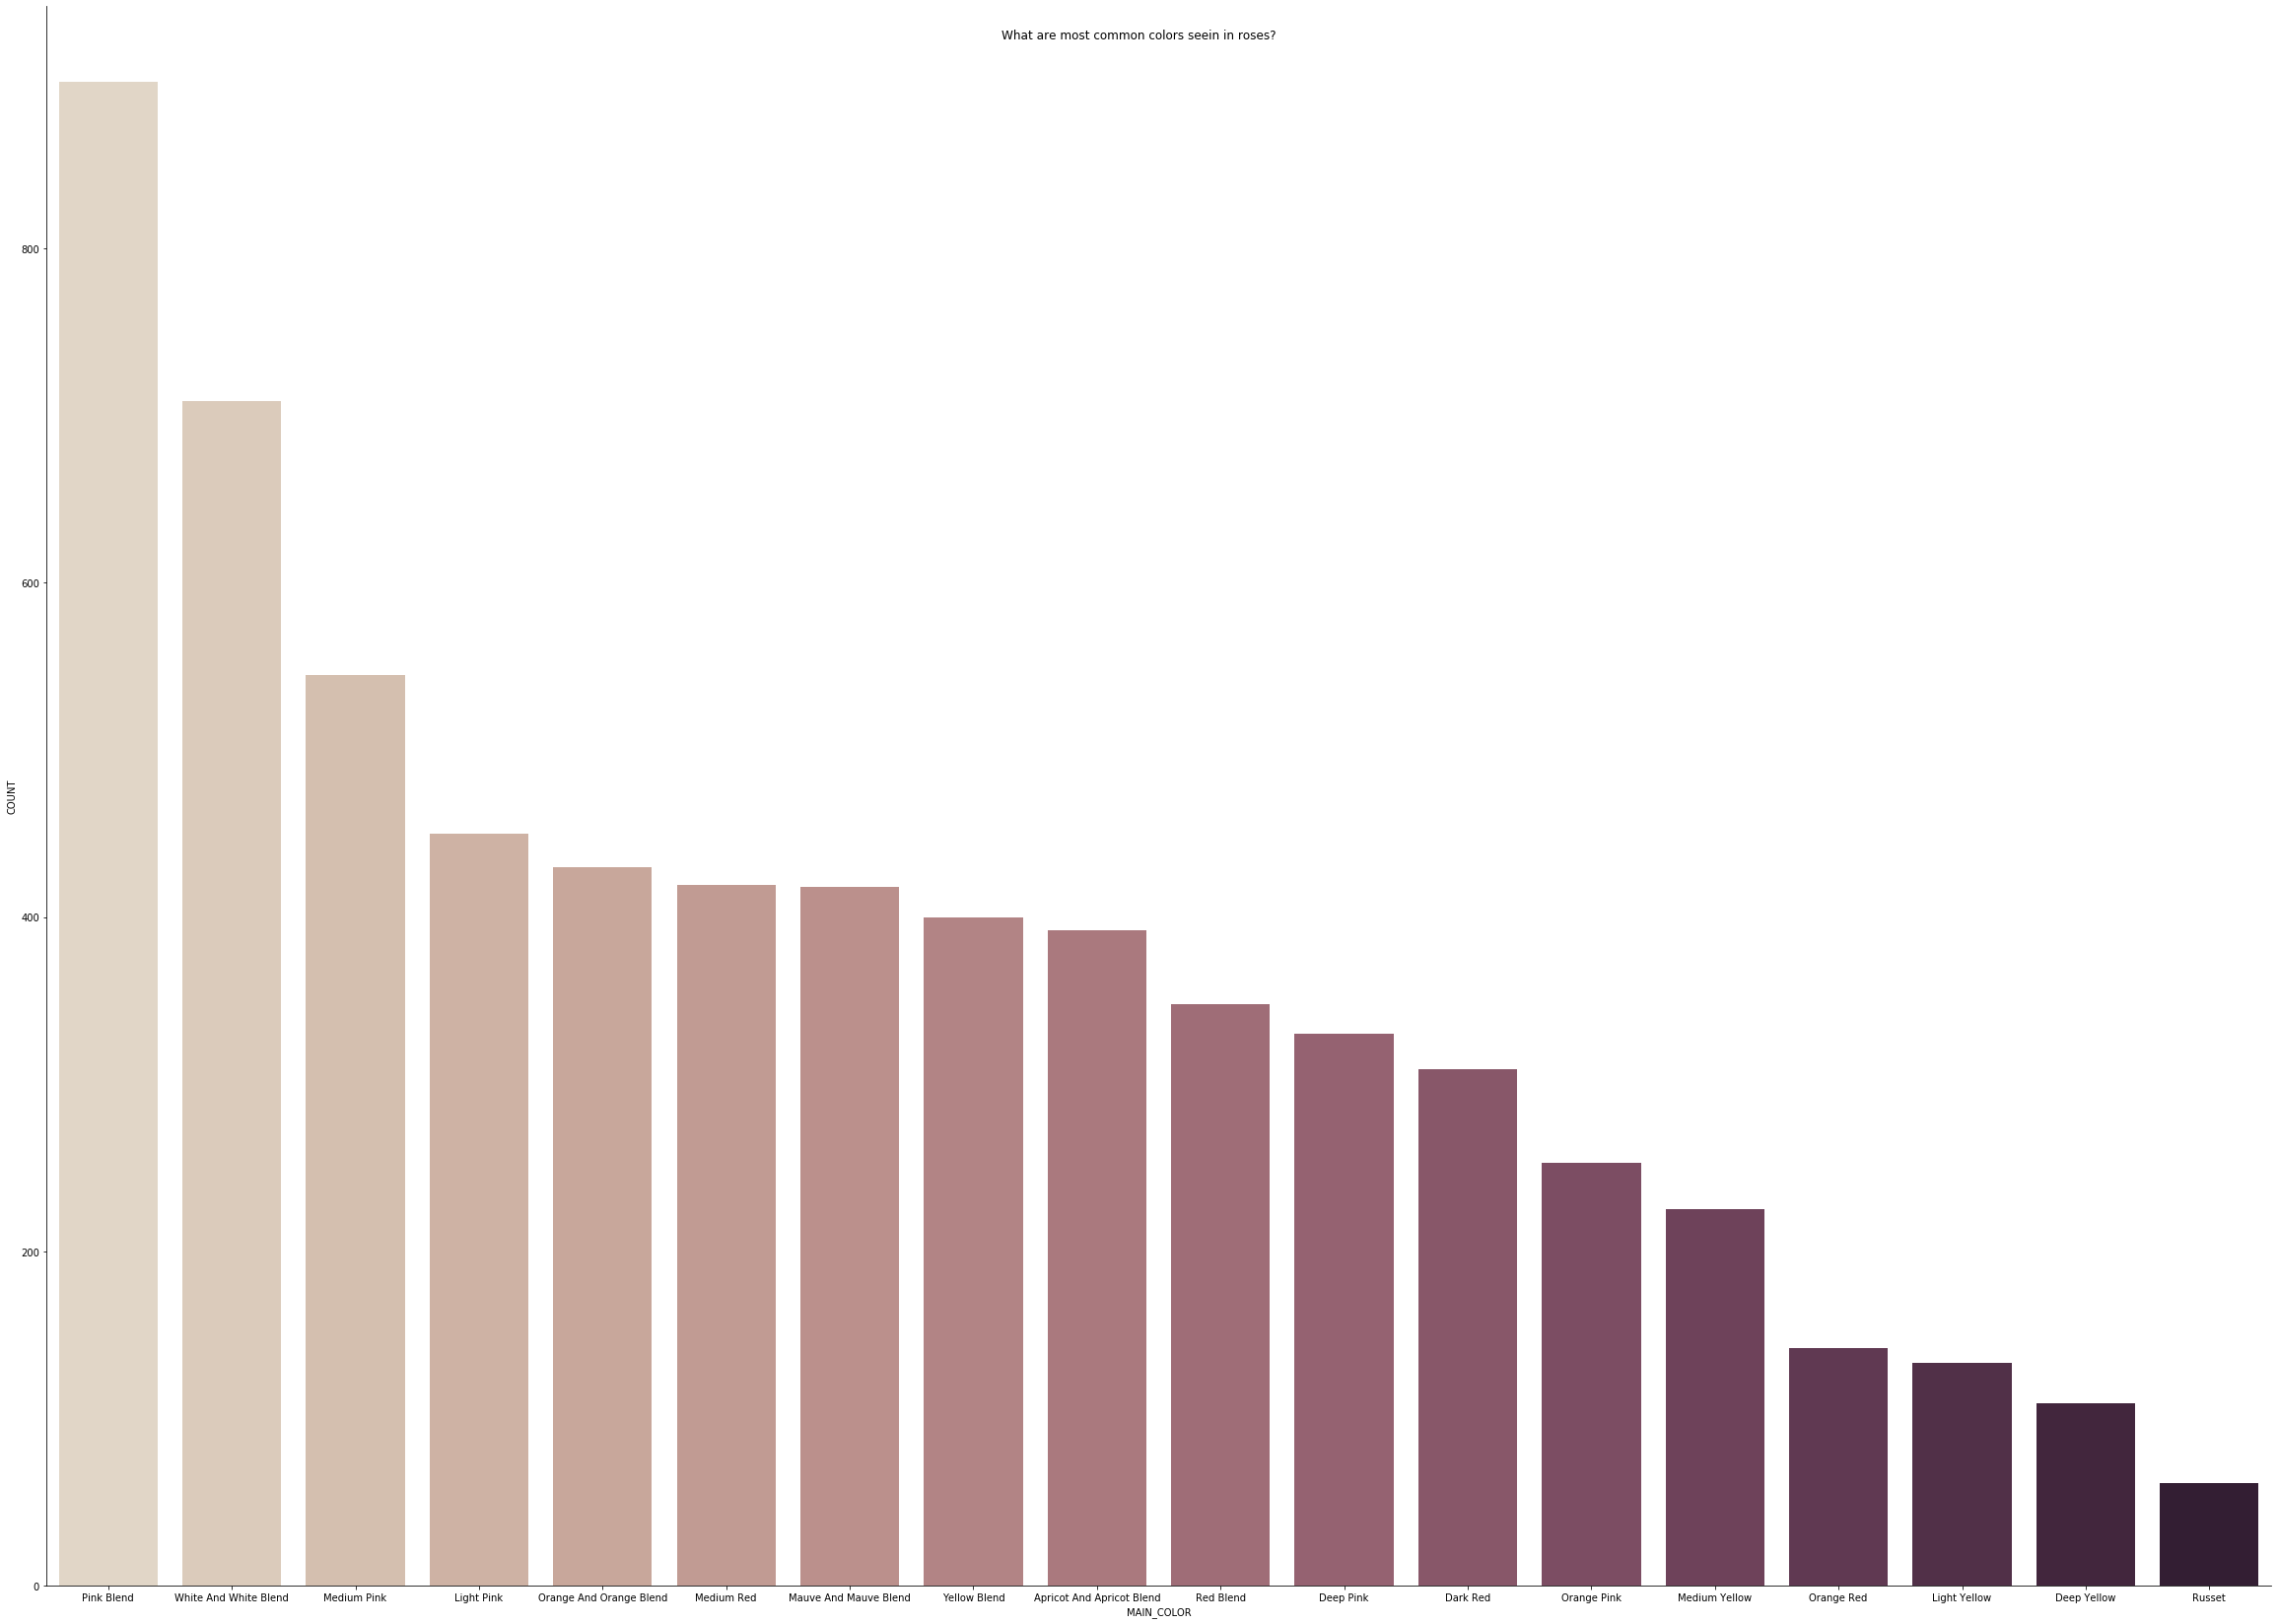

In [77]:
ax = sns.catplot(y="COUNT", x="MAIN_COLOR", kind="bar", palette="ch:.25",  data=ctn_color, height=23, aspect=1.4);

ax.fig.suptitle("What are most common colors seein in roses?")

### Who created/bread more rose varieties?

In [78]:
df['Hybridizer'].value_counts().head(100)

Ralph S. Moore                        217
David Austin                          192
Reimer Kordes                         182
Harkness                              179
W. Kordes & Sons                      145
Samuel Darragh McGredy IV             139
Unknown                               115
Unknown before                        103
Dr. Keith W. Zary                      97
Tom Carruth                            83
Dr. Griffith J. Buck                   77
William A. Warriner                    75
Alain Meilland                         73
Hans Jurgen Evers                      72
Meilland International                 69
Mathias Tantau Jr.                     57
Eugene S. Gene Boerner                 55
Olesen                                 55
Jean-Pierre Vibert                     52
John Clements                          52
Gareth Fryer                           52
J. Benjamin Williams                   49
Wilhelm J.H. Kordes II                 46
Louis Lens                        

In [79]:
# creating a dataframe with counts for column 'Hybridizer'
ctn_bred_by = df['Hybridizer'].value_counts()\
                 .to_frame('COUNT').rename_axis('Hybridizer')\
                 .reset_index()

ctn_bred_by_20 = ctn_bred_by.head(20)
ctn_bred_by_10 = ctn_bred_by.head(10)

Text(0.5, 0.98, 'Who created more roses? - Top 20 results')

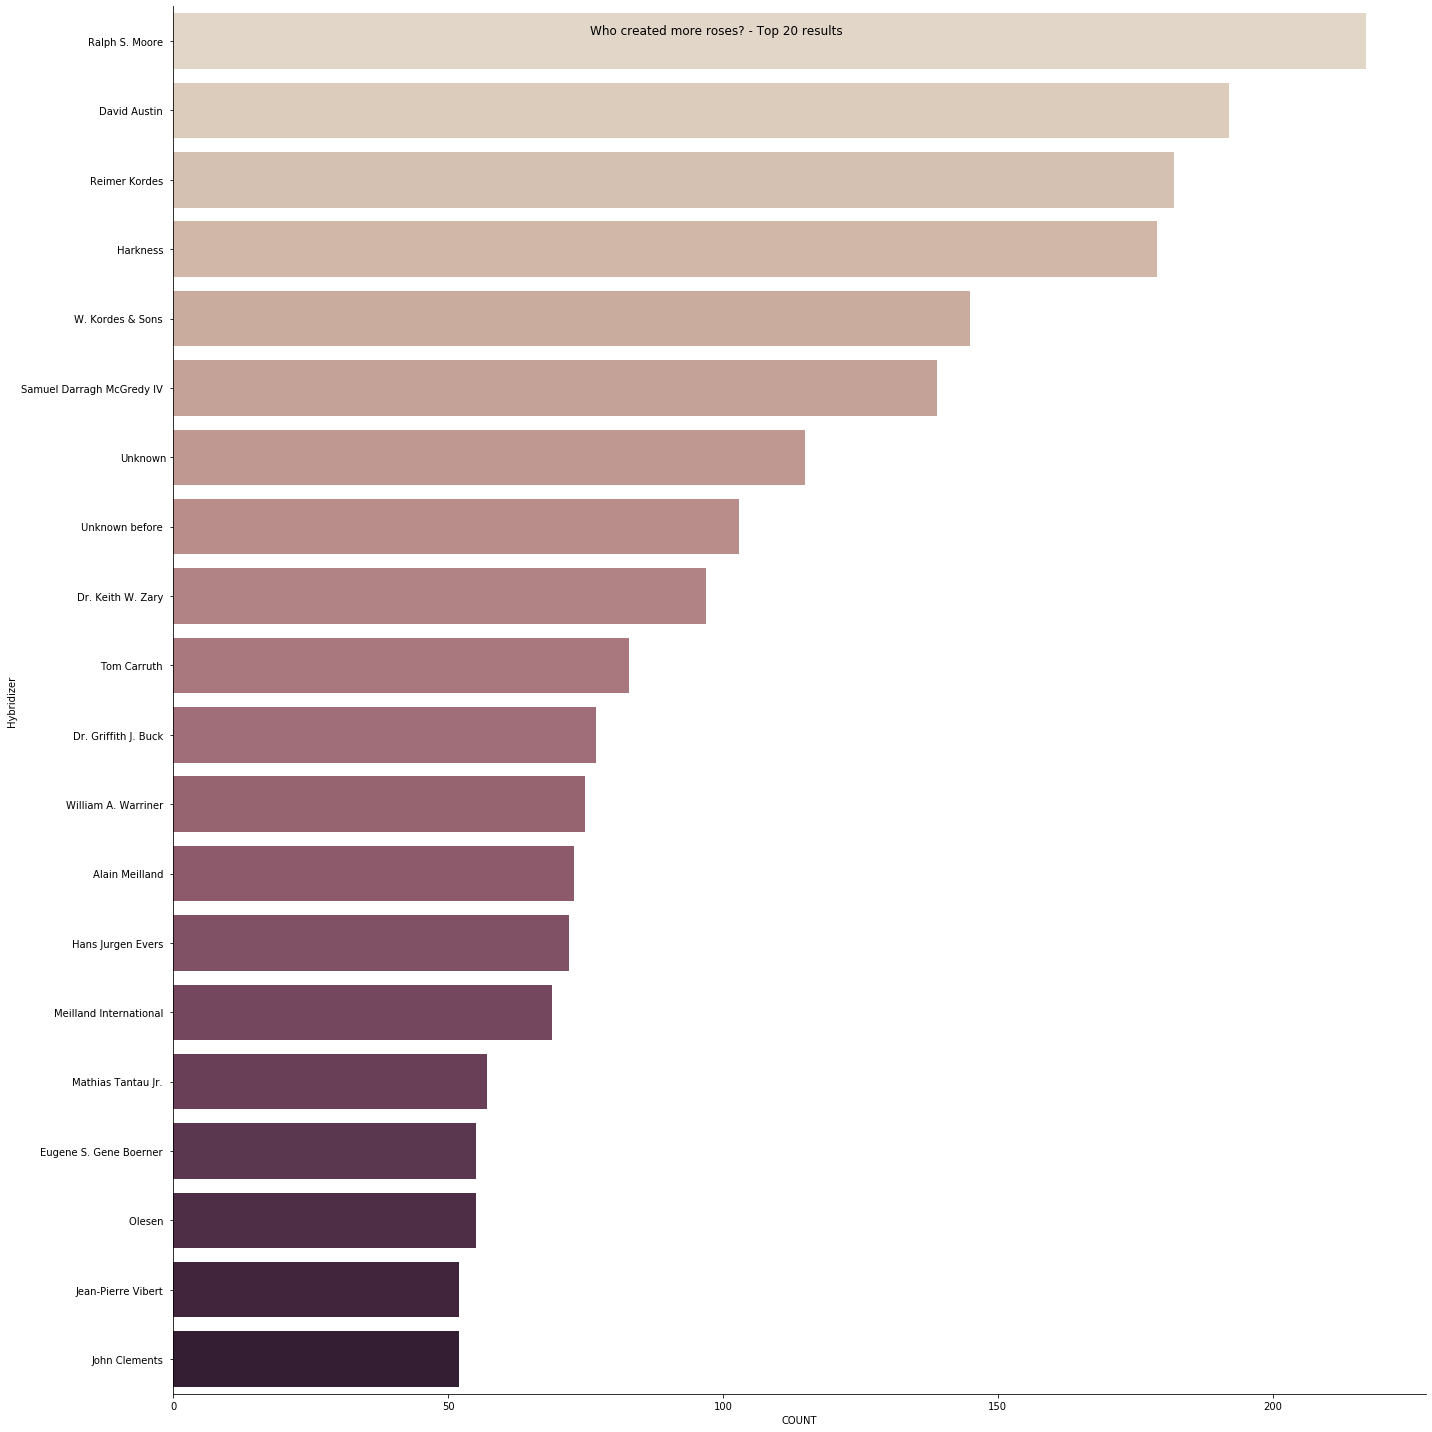

In [80]:
# plotting barchart for Hybridizer

ax = sns.catplot(y="Hybridizer", x="COUNT", kind="bar", palette="ch:.25",  data=ctn_bred_by_20, height=20, aspect=1);

ax.fig.suptitle("Who created more roses? - Top 20 results")

### Counts by Breader and Year.

In [83]:
df['Year'] = pd.to_numeric(df['YEAR'])

In [84]:
df[['YEAR', 'Hybridizer']][(df['Year'] > 1999) & (df['Year'] < 2010)].value_counts()

YEAR  Hybridizer                                    
2006  George Michael Shoup                              15
      Tom Carruth                                       12
      Alain Meilland                                    11
2001  Ralph S. Moore                                    10
      W. Kordes & Sons                                  10
2003  Ralph S. Moore                                    10
2007  Dr. Keith W. Zary                                 10
      W. Kordes & Sons                                   9
2006  Ralph S. Moore                                     9
2004  Tom Carruth                                        9
2007  David Austin                                       9
2005  Dr. Keith W. Zary                                  9
2002  W. Kordes & Sons                                   8
2000  John Clements                                      8
      W. Kordes & Sons                                   8
2008  Dr. Keith W. Zary                                  8
200

In [85]:
df[['YEAR']].value_counts(sort=False)

YEAR
1240      1
1400      1
1450      1
1551      1
1557      1
1560      1
1581      1
1589      1
1597      2
1612      1
1629      1
1633      1
1659      1
1664      1
1696      1
1700      1
1730      1
1732      1
1739      1
1750      1
1752      1
1759      2
1765      1
1773      2
1775      2
1788      1
1789      4
1790      3
1791      1
1792      1
1793      1
1795      1
1798      1
1799      2
1800      5
1801      1
1804      2
1806      2
1807      1
1808      3
1810      7
1811      5
1812      1
1813      3
1814      3
1815      5
1816      1
1817      9
1818      4
1819      5
1820      2
1821      3
1822      2
1823      3
1824      7
1825      6
1826      5
1827      6
1828      9
1829      9
1830     10
1831      3
1832      6
1833      2
1834     12
1835     11
1836      5
1837     14
1838      7
1839      5
1840      5
1841      6
1842      8
1843     13
1844      2
1845     24
1846     15
1847      7
1848      6
1849      3
1850      5
1851      7
1852      7

In [86]:
df['Year'].value_counts(bins=3)

(1759.333, 2019.0]      6233
(1499.667, 1759.333]      21
(1239.22, 1499.667]        3
Name: Year, dtype: int64

In [87]:
df['Year'].value_counts(bins=5)

(1863.2, 2019.0]     5827
(1707.4, 1863.2]      413
(1551.6, 1707.4]       13
(1395.8, 1551.6]        3
(1239.22, 1395.8]       1
Name: Year, dtype: int64

In [88]:
df['Year'].value_counts(bins=10)

(1941.1, 2019.0]     4903
(1863.2, 1941.1]      924
(1785.3, 1863.2]      401
(1707.4, 1785.3]       12
(1551.6, 1629.5]        8
(1629.5, 1707.4]        5
(1395.8, 1473.7]        2
(1473.7, 1551.6]        1
(1239.22, 1317.9]       1
(1317.9, 1395.8]        0
Name: Year, dtype: int64

In [89]:
df['Year'].value_counts(bins=30)

(1993.033, 2019.0]      2179
(1967.067, 1993.033]    1898
(1941.1, 1967.067]       826
(1915.133, 1941.1]       419
(1889.167, 1915.133]     318
(1837.233, 1863.2]       214
(1863.2, 1889.167]       187
(1811.267, 1837.233]     146
(1785.3, 1811.267]        41
(1759.333, 1785.3]         5
(1733.367, 1759.333]       5
(1577.567, 1603.533]       4
(1551.6, 1577.567]         2
(1603.533, 1629.5]         2
(1655.467, 1681.433]       2
(1681.433, 1707.4]         2
(1707.4, 1733.367]         2
(1629.5, 1655.467]         1
(1525.633, 1551.6]         1
(1447.733, 1473.7]         1
(1395.8, 1421.767]         1
(1239.22, 1265.967]        1
(1499.667, 1525.633]       0
(1473.7, 1499.667]         0
(1421.767, 1447.733]       0
(1369.833, 1395.8]         0
(1343.867, 1369.833]       0
(1317.9, 1343.867]         0
(1291.933, 1317.9]         0
(1265.967, 1291.933]       0
Name: Year, dtype: int64

### What are the most popular rose classes? 

In [90]:
# creating a dataframe with counts for column class
ctn_class = df['Class'].value_counts()\
                 .to_frame('COUNT').rename_axis('Class')\
                 .reset_index()

ctn_class_15 = ctn_class.head(15)
ctn_class_25 = ctn_class.head(25)
ctn_class_35 = ctn_class.head(35)

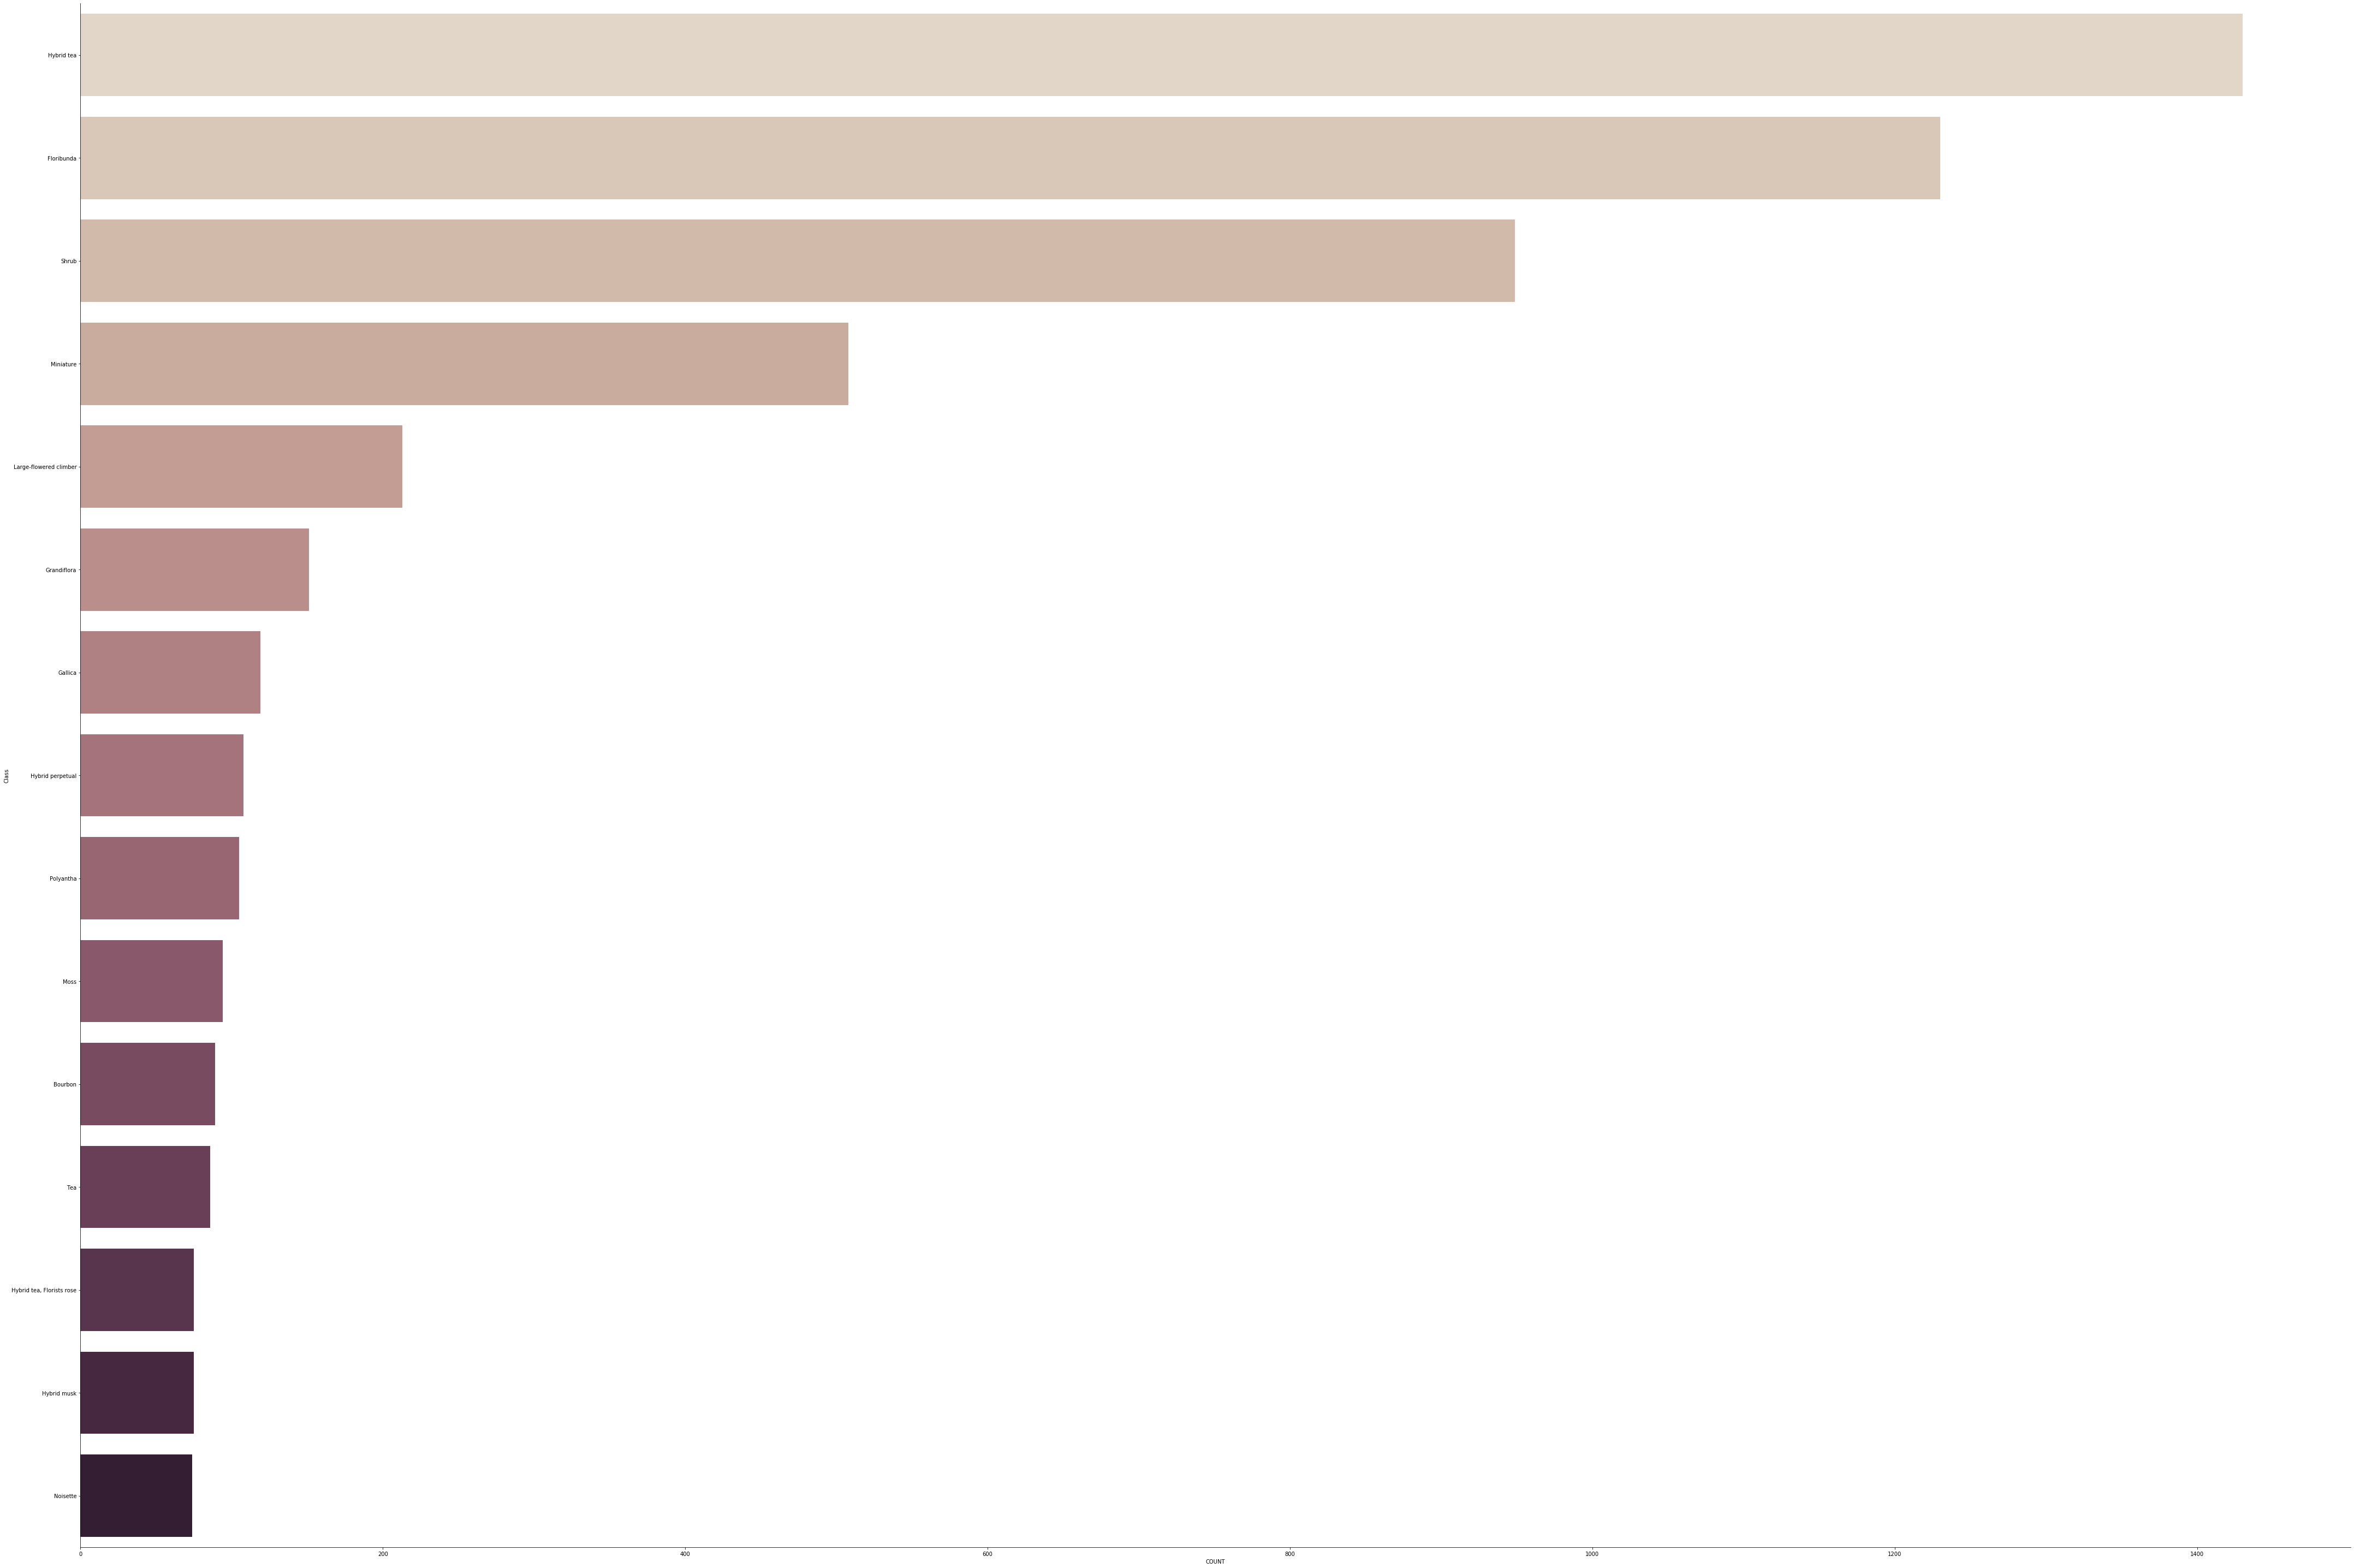

In [91]:
ax = sns.catplot(y="Class", x="COUNT", kind="bar", palette="ch:.25",  data=ctn_class_15, height=40, aspect=1.5);


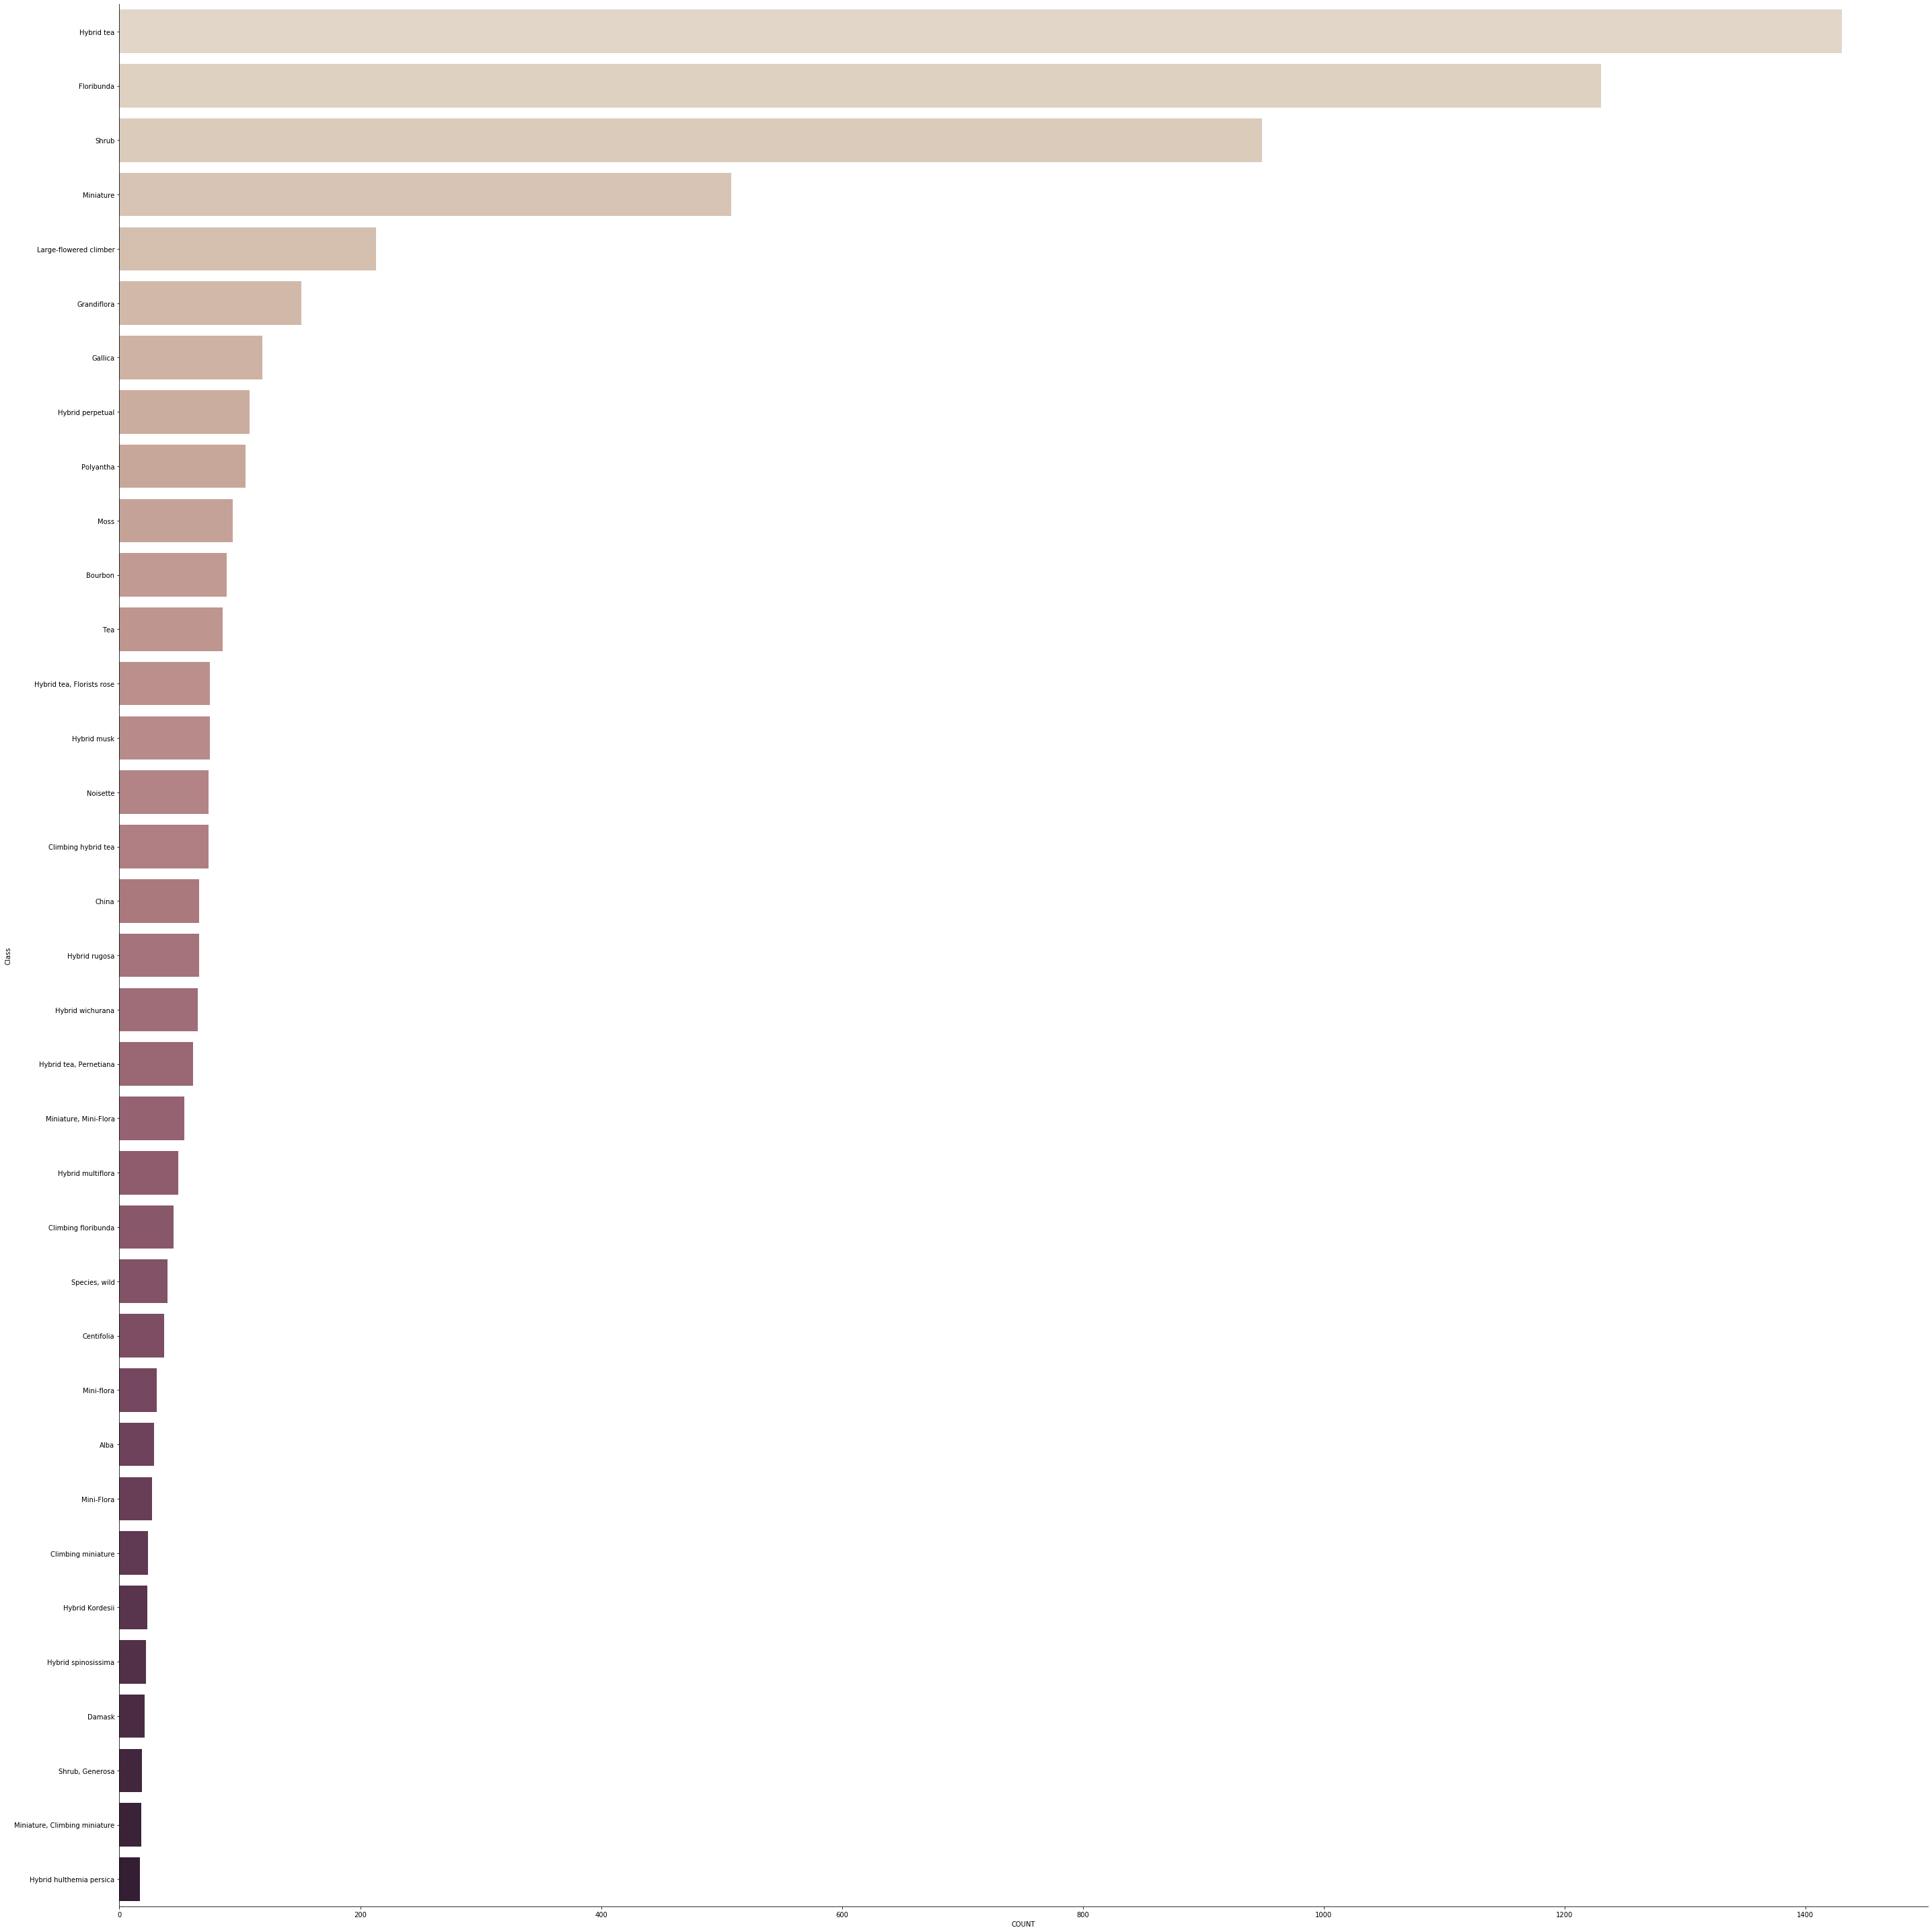

In [93]:
ax = sns.catplot(y="Class", x="COUNT", kind="bar", palette="ch:.25",  data=ctn_class_35, height=40, aspect=1);

